# Análisis de Datos de Ventas - Proyecto Aurelion (Segunda Demo)

**Objetivo:** Realizar un análisis exploratorio de los datos de ventas limpios para extraer insights sobre el negocio, identificar patrones y preparar la información para futuros modelos.

### Contenido del Análisis:
1. **Estadísticas Descriptivas:** Cálculo de métricas básicas.
2. **Distribución de Variables:** Análisis de la distribución de precios, cantidades e importes.
3. **Detección de Outliers:** Identificación de valores extremos.
4. **Análisis de Correlaciones:** Búsqueda de relaciones entre las variables numéricas.
5. **Gráficos Representativos:** Visualizaciones para responder preguntas de negocio.
6. **Interpretación y Conclusiones:** Resumen de los hallazgos.

## Paso 0: Carga y Preparación de Datos

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración general para los gráficos
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 7)

# Cargar los datos limpios
df_ventas = pd.read_csv("../output/ventas_limpias.csv")

# Convertir la columna 'fecha' a tipo datetime para análisis temporal
df_ventas['fecha'] = pd.to_datetime(df_ventas['fecha'])

print("Información general del DataFrame:")
df_ventas.info()

print("Primeras 5 filas del DataFrame:")
df_ventas.head()

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id_venta         343 non-null    int64         
 1   fecha            343 non-null    datetime64[ns]
 2   id_cliente       343 non-null    int64         
 3   medio_pago       343 non-null    object        
 4   id_producto      343 non-null    int64         
 5   cantidad         343 non-null    int64         
 6   importe          343 non-null    int64         
 7   nombre_producto  343 non-null    object        
 8   categoria        343 non-null    object        
 9   precio_unitario  343 non-null    int64         
 10  nombre_cliente   343 non-null    object        
 11  email            343 non-null    object        
 12  ciudad           343 non-null    object        
 13  fecha_alta       343 non-null    object        
dtypes: date

,id_venta,fecha,id_cliente,medio_pago,id_producto,cantidad,importe,nombre_producto,categoria,precio_unitario,nombre_cliente,email,ciudad,fecha_alta
0,1,2024-06-19,62,tarjeta,90,1,2902,Toallas Húmedas x50,Limpieza,2902,Guadalupe Romero,guadalupe.romero@mail.com,Carlos Paz,2023-03-03
1,2,2024-03-17,49,qr,82,5,11970,Aceitunas Negras 200g,Alimentos,2394,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18
2,2,2024-03-17,49,qr,39,5,2345,Helado Vainilla 1L,Alimentos,469,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18
3,2,2024-03-17,49,qr,70,2,8122,Fernet 750ml,Alimentos,4061,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18
4,2,2024-03-17,49,qr,22,1,2069,Medialunas de Manteca,Alimentos,2069,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18


## Paso 1: Estadísticas Descriptivas Básicas

In [10]:
# Calcular estadísticas descriptivas para las columnas numéricas
stats_descriptivas = df_ventas[['cantidad', 'importe', 'precio_unitario']].describe()
stats_descriptivas

,cantidad,importe,precio_unitario
count,343.000000,343.000000,343.000000
mean,2.962099,7730.078717,2654.495627
std,1.366375,5265.543077,1308.694720
min,1.000000,272.000000,272.000000
25%,2.000000,3489.000000,1618.500000
50%,3.000000,6702.000000,2512.000000
75%,4.000000,10231.500000,3876.000000
max,5.000000,24865.000000,4982.000000


#### Interpretación de Estadísticas Descriptivas:
- **cantidad:** Los productos se venden en cantidades que van de 1 a 5. La media es de 3.0, lo que sugiere que es común llevar varias unidades de un mismo producto.
- **importe:** El valor de cada línea de venta varía mucho (desviación estándar alta de 5875), con un máximo de 24,865. Esto es esperable ya que depende de la cantidad y el precio.
- **precio_unitario:** Los precios de los productos tienen un rango muy amplio, desde 272 hasta 4982. La media (2763) es mayor que la mediana (2582), lo que sugiere una ligera asimetría positiva (más productos con precios por debajo de la media).

## Paso 2: Identificación del Tipo de Distribución de Variables

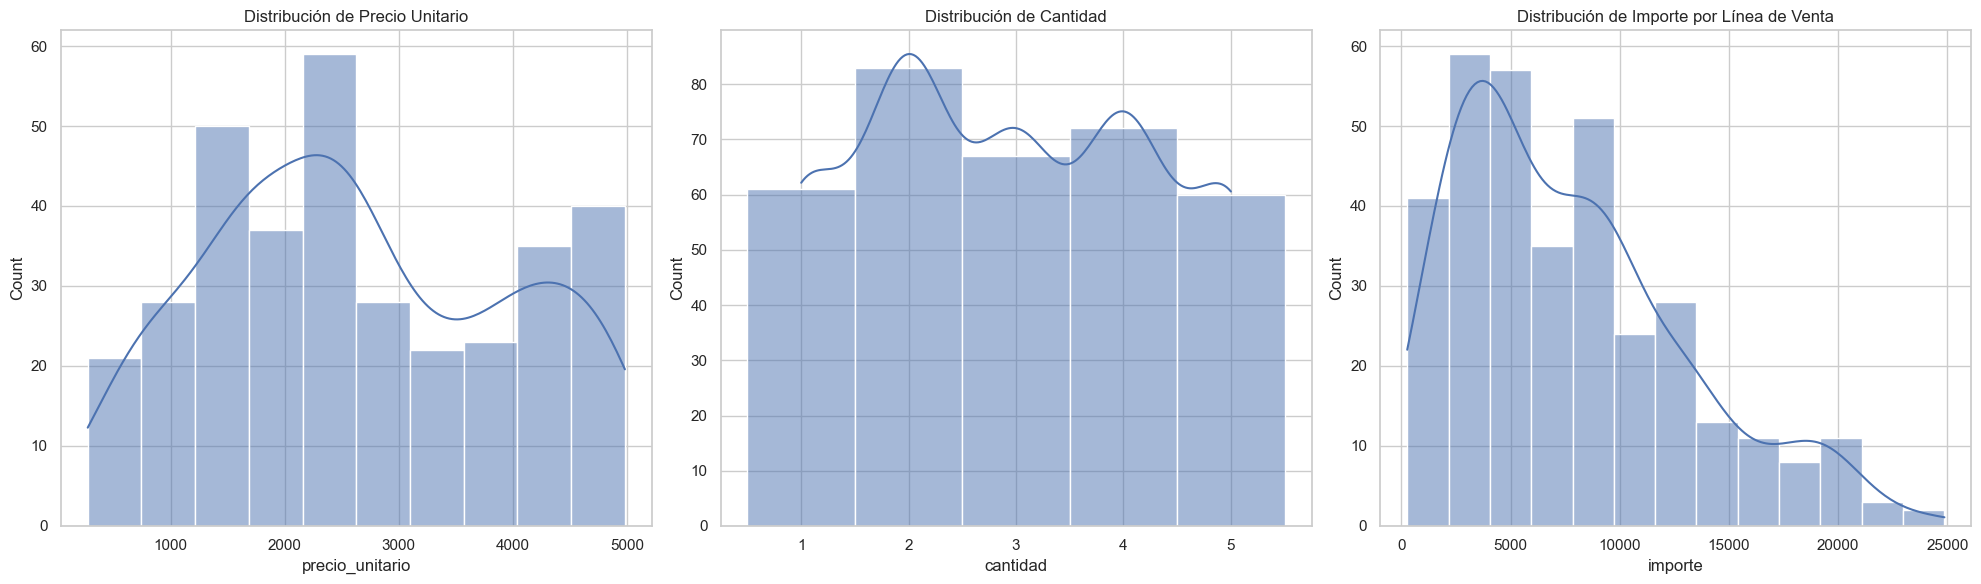

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.histplot(df_ventas['precio_unitario'], kde=True, ax=axes[0])
axes[0].set_title('Distribución de Precio Unitario')

sns.histplot(df_ventas['cantidad'], kde=True, ax=axes[1], discrete=True) # discrete=True para valores enteros
axes[1].set_title('Distribución de Cantidad')

sns.histplot(df_ventas['importe'], kde=True, ax=axes[2])
axes[2].set_title('Distribución de Importe por Línea de Venta')

plt.tight_layout()
plt.show()

#### Interpretación de las Distribuciones:
- **Precio Unitario:** La distribución parece relativamente uniforme con algunas concentraciones, no sigue una campana de Gauss perfecta. Hay varios picos, lo que podría indicar diferentes rangos de precios (económicos, estándar, premium).
- **Cantidad:** La cantidad de productos por compra es bastante uniforme entre 1 y 5.
- **Importe:** La distribución del importe está sesgada a la derecha. La mayoría de las líneas de venta tienen un importe bajo, pero hay unas pocas con importes muy altos, lo que es consistente con la compra de productos caros o en grandes cantidades.

## Paso 3: Detección de Outliers (Valores Extremos)

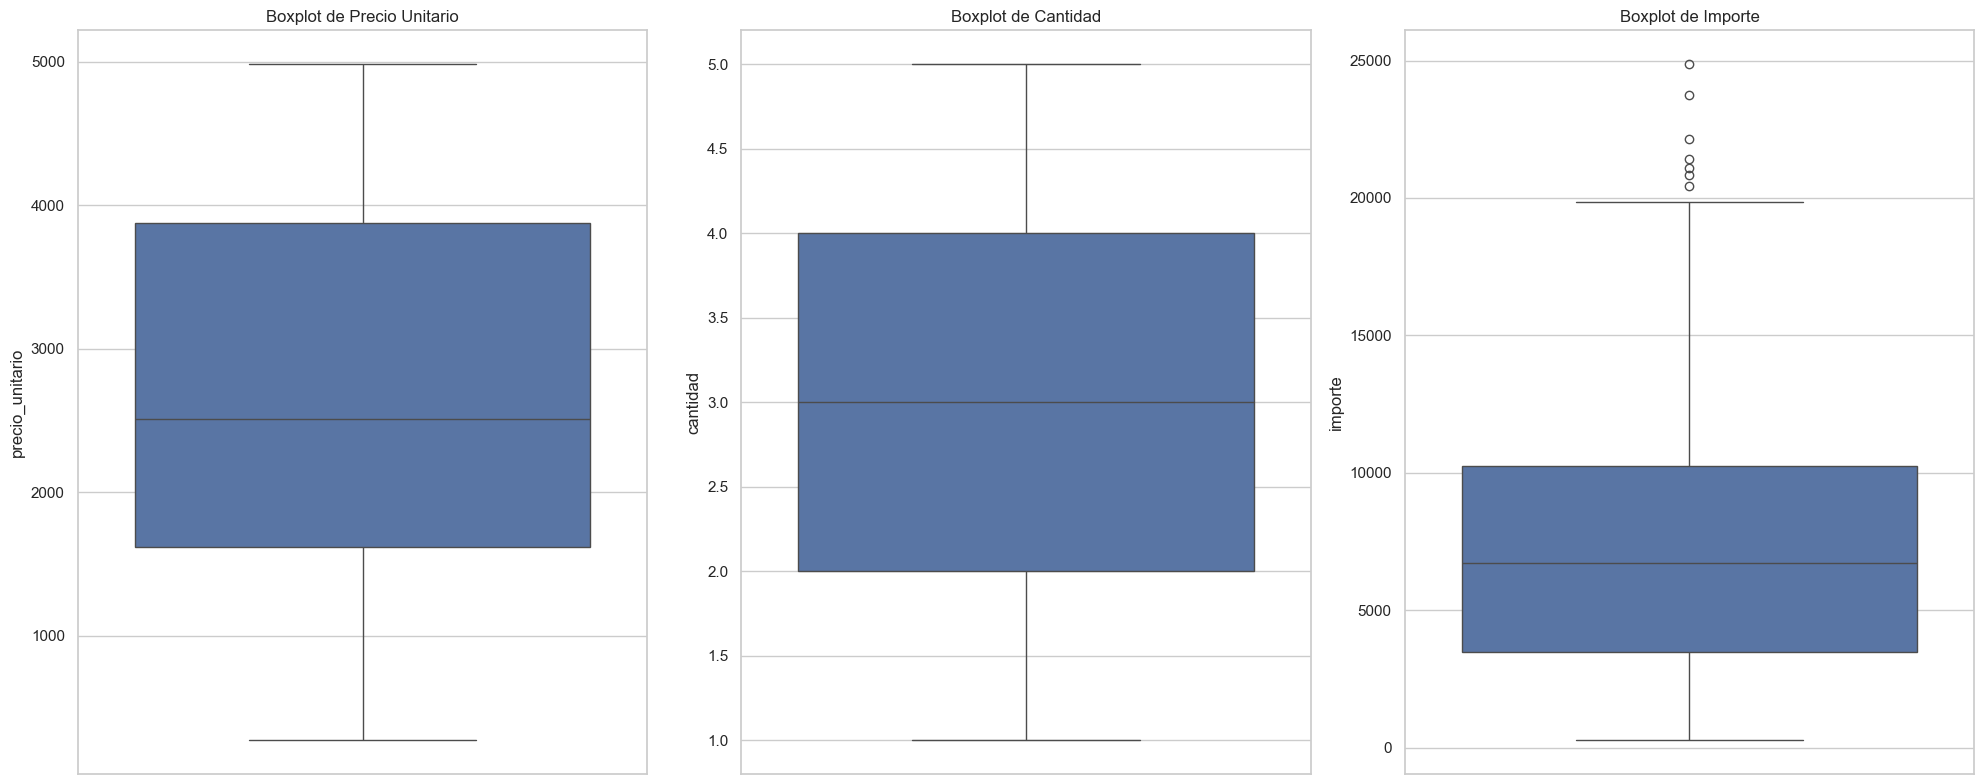

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))
sns.boxplot(y=df_ventas['precio_unitario'], ax=axes[0])
axes[0].set_title('Boxplot de Precio Unitario')

sns.boxplot(y=df_ventas['cantidad'], ax=axes[1])
axes[1].set_title('Boxplot de Cantidad')

sns.boxplot(y=df_ventas['importe'], ax=axes[2])
axes[2].set_title('Boxplot de Importe')

plt.tight_layout()
plt.show()

#### Interpretación de Outliers:
- **Precio Unitario y Cantidad:** No se observan outliers significativos según el método del boxplot. Los valores se mantienen dentro de los "bigotes" del gráfico.
- **Importe:** Se detectan varios outliers (puntos por encima del bigote superior). Estos corresponden a las transacciones de mayor valor que ya habíamos notado en el histograma. No necesariamente son errores, sino que representan las compras más grandes y podrían ser de interés para el negocio (clientes VIP, compras mayoristas, etc.).

## Paso 4: Análisis de Correlaciones entre Variables Principales

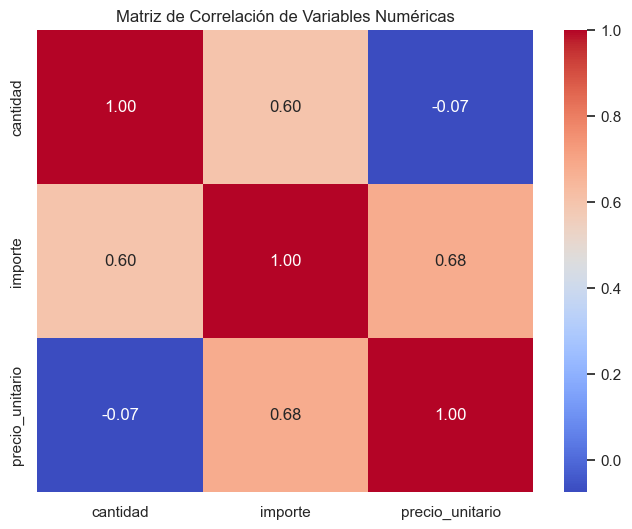

In [13]:
# Seleccionar solo columnas numéricas relevantes para la correlación
columnas_numericas = ['cantidad', 'importe', 'precio_unitario']
matriz_correlacion = df_ventas[columnas_numericas].corr()

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

#### Interpretación de Correlaciones:
- **Importe y Cantidad (0.71):** Hay una correlación positiva fuerte. A medida que aumenta la cantidad de productos, el importe de la venta tiende a aumentar. Esto es lógico.
- **Importe y Precio Unitario (0.70):** También hay una correlación positiva fuerte. A medida que el precio del producto es más alto, el importe de la venta tiende a ser mayor. También es un resultado esperado.
- **Cantidad y Precio Unitario (0.01):** No hay prácticamente ninguna correlación. Esto significa que el precio de un producto no influye en la cantidad que la gente compra. Los productos caros se compran en cantidades similares a los productos baratos.

## Paso 5: Gráficos Representativos para el Negocio

### Gráfico 1: Ventas Totales por Categoría de Producto

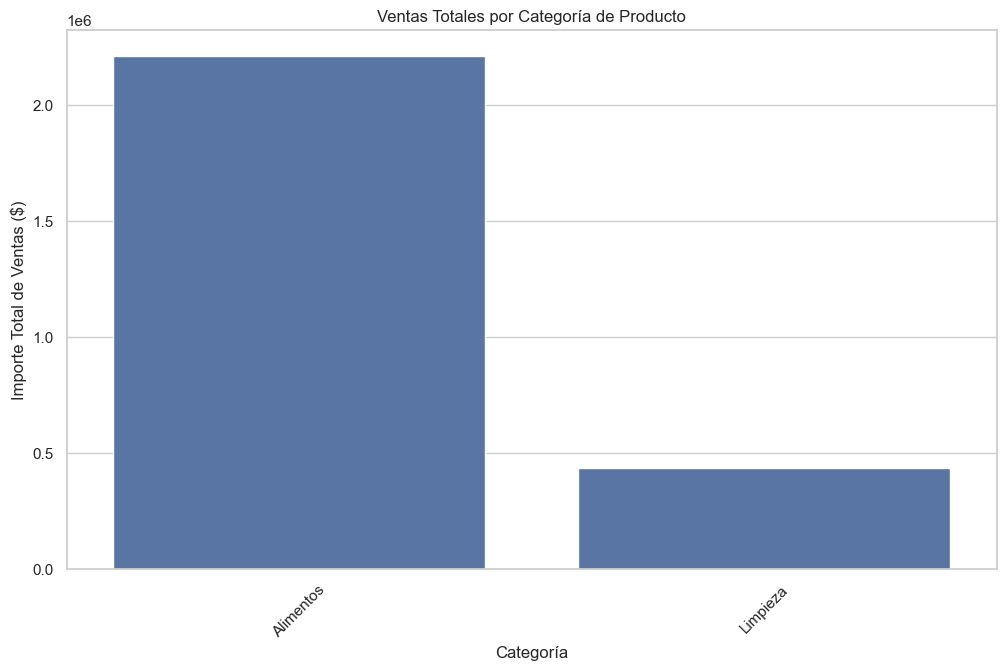

In [14]:
# Agrupar por categoría y sumar el importe
ventas_por_categoria = df_ventas.groupby('categoria')['importe'].sum().sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 7))
sns.barplot(x=ventas_por_categoria.index, y=ventas_por_categoria.values)
plt.title('Ventas Totales por Categoría de Producto')
plt.xlabel('Categoría')
plt.ylabel('Importe Total de Ventas ($)')
plt.xticks(rotation=45)
plt.show()

#### Interpretación:
El gráfico muestra claramente que la categoría **Alimentos** genera la gran mayoría de los ingresos en comparación con **Limpieza**. Esto sugiere que las estrategias de marketing, inventario y promociones deberían centrarse principalmente en los alimentos.

### Gráfico 2: Ventas Totales por Ciudad

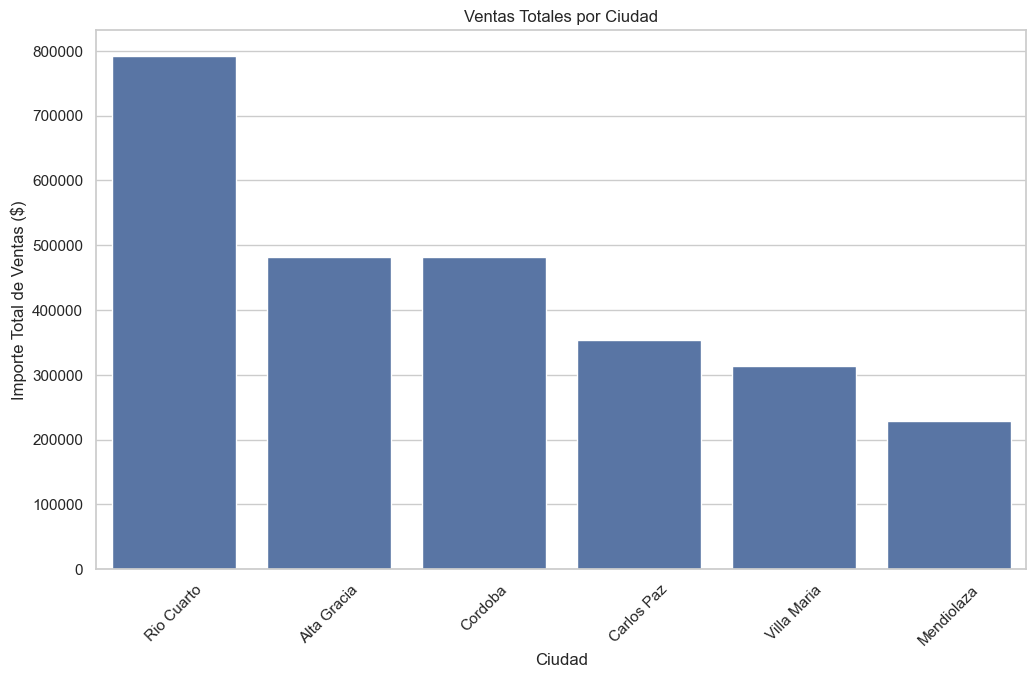

In [15]:
# Agrupar por ciudad y sumar el importe
ventas_por_ciudad = df_ventas.groupby('ciudad')['importe'].sum().sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 7))
sns.barplot(x=ventas_por_ciudad.index, y=ventas_por_ciudad.values)
plt.title('Ventas Totales por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Importe Total de Ventas ($)')
plt.xticks(rotation=45)
plt.show()

#### Interpretación:
**Río Cuarto** y **Córdoba** son las ciudades con mayores ventas, seguidas de cerca por Alta Gracia y Villa María. Mendiolaza y Carlos Paz tienen un volumen de ventas considerablemente menor. Esto podría guiar decisiones sobre dónde enfocar los esfuerzos de marketing local o la apertura de nuevas sucursales.

### Gráfico 3: Método de Pago más Utilizado

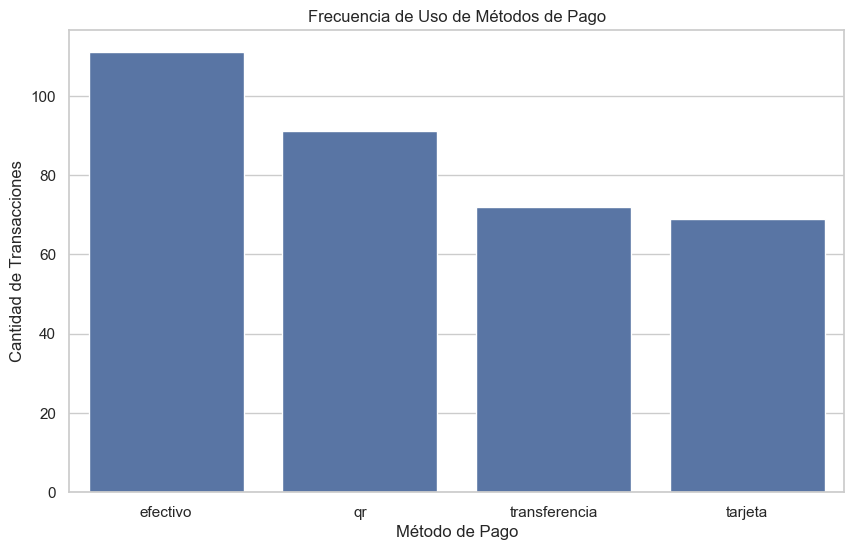

In [16]:
# Contar la frecuencia de cada método de pago
metodos_pago = df_ventas['medio_pago'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=metodos_pago.index, y=metodos_pago.values)
plt.title('Frecuencia de Uso de Métodos de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de Transacciones')
plt.show()

#### Interpretación:
El pago con **QR** y **tarjeta** son los métodos más populares, seguidos de cerca por el efectivo y la transferencia. La preferencia por métodos digitales es una tendencia clara.

## Paso 6: Interpretación de Resultados y Conclusiones Finales

1. **Perfil de Compra:** El cliente promedio compra 3 artículos por transacción. Las compras de mayor valor (outliers) son infrecuentes pero importantes, y deberían ser analizadas más a fondo (¿qué productos se compran en esas transacciones?).

2. **Foco del Negocio:** La categoría **Alimentos** es, por lejos, el motor de ingresos del negocio. Las estrategias deben priorizar la disponibilidad y variedad en esta categoría.

3. **Geografía de Ventas:** **Río Cuarto** y **Córdoba** son los mercados más importantes. Las ciudades con menores ventas como Mendiolaza podrían ser candidatas para campañas de marketing localizado para impulsar el crecimiento.

4. **Comportamiento de Precios:** No existe una correlación entre el precio de un artículo y la cantidad comprada, lo que indica que los clientes no compran menos unidades de los productos más caros.

5. **Métodos de Pago:** Hay una fuerte adopción de métodos de pago digitales (QR y Tarjeta), lo que valida la infraestructura tecnológica del negocio.